# Confounding Demo

This Jupyter notebook contains a demonstration of some of the basic functions of the Natural Language to Bayesian Network Agent. We specifically look at a classic case of confounding.

## Install the Package

In [1]:
!pip install git+https://github.com/davidbkinney/NaLBaNA.git

  Cloning https://github.com/davidbkinney/NaLBaNA.git to /tmp/pip-req-build-y2a6p9i3
  Running command git clone --filter=blob:none --quiet https://github.com/davidbkinney/NaLBaNA.git /tmp/pip-req-build-y2a6p9i3
  Resolved https://github.com/davidbkinney/NaLBaNA.git to commit a3139b2eea492234005ac8e555ae6936ca45f21e
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for NaLBaNA: filename=nalbana-0.1.0-py3-none-any.whl size=16840 sha256=58b91e825282a5bb989740771c2aa910bd0ac7238252ed3224603f15f040007a
  Stored in directory: /tmp/pip-ephem-wheel-cache-h2usocc0/wheels/62/e1/ea/cb2d09e65fb5e1b0631548ddf6b610efa3102537ac04eb6ba5
Successfully built NaLBaNA


In [2]:
from NaLBaNA import bayes_net

## Connect to the OpenAI API

In [3]:
bayes_net.input_key("Your API Key")

## Three-Variable Confounder Structure

Here we examine a three-variable causal structure where one variable confounds a causal relationship between the other two.

First we input our prompt.

In [4]:
prompt = """
Exercise causes weight loss and increased eating. Increased eating causes weight
gain. Use a single variable to represent weight loss and weight gain.
"""

Next, we generate a Bayesian network from that prompt.

In [33]:
bn = bayes_net.generate_bayes_net(prompt)

Extracting variables.
Variables extracted.
Generating variable values.
Variable values generated.
Defining causal graph.
Causal graph defined.
Generating conditional probability tables.
1 of 3 conditional probability tables generated (one per variable).
2 of 3 conditional probability tables generated (one per variable).
3 of 3 conditional probability tables generated (one per variable).
Conditional probability tables generated.
Bayesian network generated!


Now we visualize the causal graph.

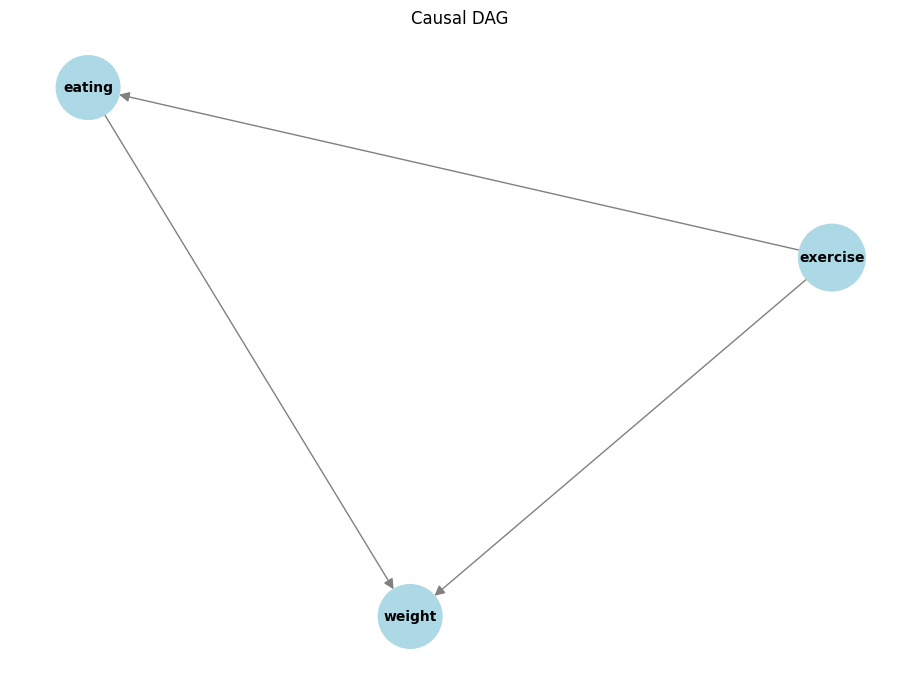

In [34]:
bayes_net.visualize(bn)

Let's examine the variables and their values. **IMPT: The names of your variables and values may differ from those shown here, depending on what the LLM actually outputs. When making the function calls below, you must change variable names and values to reflect your actual output from the previous LLM call.**

In [35]:
bn.values

[{'variable': 'exercise', 'values': ['low', 'high']},
 {'variable': 'eating', 'values': ['low', 'high']},
 {'variable': 'weight', 'values': ['decrease', 'increase']}]

Now, let's look at the conditional probability table over weight, given exercise.

In [37]:
bayes_net.get_conditional_probability_table(bn,'weight',
                                       ['exercise'])

,,exercise=low,exercise=high
0,decrease,0.354208,0.50101
1,increase,0.645792,0.49899


As we can see, it looks like there is a very moderate effect of exercise on body weight. But when we look at the conditional probability table over weight given both eating and exercise, along with the conditional probability table over eating given exercise, we can see clearly that the weak correlation observed here is due to increased eating as a result of increased exercise, which leads to increased weight.

In [38]:
bayes_net.get_conditional_probability_table(bn,'weight',
                                       ['exercise','eating'])

,,exercise=low eating=low,exercise=low eating=high,exercise=high eating=low,exercise=high eating=high
0,decrease,0.401312,0.197816,0.832018,0.401312
1,increase,0.598688,0.802184,0.167982,0.598688


In [39]:
bayes_net.get_conditional_probability_table(bn,'eating',
                                       ['exercise'])

,,exercise=low,exercise=high
0,low,0.768525,0.231475
1,high,0.231475,0.768525


If we intervene to fix a person's level of eating, we see that, having fixed the level of eating so that it has decreased, exercise is actually associated with weight loss.

In [41]:
bayes_net.get_conditional_probability_table(bn,'weight',
                                       ['exercise'],
                                        intervention=[{"variable":"eating",
                                                       "value":"low"}])

,,exercise=low,exercise=high
0,decrease,0.401312,0.832018
1,increase,0.598688,0.167982
